In [31]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from sklearn import svm
from scipy.stats import norm
import matplotlib.pyplot as plt

### Read data from files

In [5]:
companies = ['MMM','AXP','AAPL','BA','CAT','CVX','CSCO','KO','DWDP','XOM',
             'GE','GS','HD','IBM','INTC','JNJ','JPM','MCD','MRK','MSFT',
             'NKE','PFE','PG','TRV','UNH','UTX','VZ','V','WMT','DIS']

df = None
for company in companies:
    temp_df = pd.read_excel('data\{}.xlsx'.format(company,na_value='nan'))
    if df is None:
        df = temp_df
    else:
        df = df.append(temp_df,ignore_index = True)
    
# rename variables
df = df.rename(index=str,columns={'OptType':'CallPut','Spot':'S','Strike':'K','Rate':'rd','DvYd':'q','IVM':'sigma','DyEx':'T','Mid':'Option Price'})

In [6]:
# drop Ticker and Volm to make the dataset
dataset = df.drop(labels=['Ticker','Volm'],axis=1)
# column names
colname = dataset.columns.values
print('Input Varaibles: ')
print(dataset.columns.values[:-1])
print("Output Variable")
print(dataset.columns.values[-1])

# drop sigma=0
dataset = dataset[dataset['sigma']!=0]
# transform T to year
dataset['T'] = dataset['T']/365
# change rd,q,sigma into percent
dataset['rd'] = dataset['rd']/100
dataset['q'] = dataset['q']/100
dataset['sigma'] = dataset['sigma']/100

# transform dataframe into numpy array and shuffle the data
dataset = np.array(dataset)
np.random.shuffle(dataset)

X = dataset[:,:-1]
Y = dataset[:,-1].reshape(-1,1)

# normalize X
X = (X-np.mean(X,axis=0))/np.std(X,axis=0)

Input Varaibles: 
['CallPut' 'S' 'K' 'rd' 'q' 'sigma' 'T']
Output Variable
Option Price


### Train test split

In [7]:
test_ratio = 0.2
num_test = int(test_ratio*dataset.shape[0])
X_test = X[:num_test]
X_train = X[num_test:]
Y_test = Y[:num_test]
Y_train = Y[num_test:]

### Train the Neural Networkmodel = Sequential()
#model.add(BatchNormalization(input_shape=[7]))
model.add(Dense(128, input_shape = [7], activation='relu'))
model.add(Dense(128,activation ='relu'))
model.add(Dense(1, activation ='relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

model.fit(x=X_train, y=Y_train, batch_size=64, epochs=50, verbose=1, callbacks=None, validation_split=0.2,shuffle=True)

In [35]:
model = Sequential()
#model.add(BatchNormalization(input_shape=[7]))
model.add(Dense(128, input_shape = [7], activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1, activation ='relu'))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

hist = model.fit(x=X_train,y=Y_train, epochs=1000, batch_size=64, validation_split=0.2, verbose=1,shuffle=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               1024      
_________________________________________________________________
dense_22 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 129       
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________
Train on 8108 samples, validate on 2027 samples
Epoch 1/1000
8108/8108 [==============================] - 0s 48us/step - loss: 650.1328 - val_loss: 554.2459
Epoch 2/1000
8108/8108 [==============================] - 0s 25us/step - loss: 235.4720 - val_loss: 84.4676
Epoch 3/1000
8108/8108 [==============================] - 0s 25us/step - loss: 106.0926 - val_loss: 67.0587
Epoch 4/1000
8108/8108 [=====

8108/8108 [==============================] - 0s 31us/step - loss: 1.3011 - val_loss: 0.8163
Epoch 147/1000
8108/8108 [==============================] - 0s 31us/step - loss: 2.0772 - val_loss: 0.6002
Epoch 148/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9908 - val_loss: 1.3141
Epoch 149/1000
8108/8108 [==============================] - 0s 29us/step - loss: 1.0677 - val_loss: 0.5640
Epoch 150/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9567 - val_loss: 0.5281
Epoch 151/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.8783 - val_loss: 3.6310
Epoch 152/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.8089 - val_loss: 1.0001
Epoch 153/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7659 - val_loss: 2.8924
Epoch 154/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.9608 - val_loss: 0.4737
Epoch 155/1000
8108/8108 [==========================

8108/8108 [==============================] - 0s 31us/step - loss: 0.7518 - val_loss: 4.4642
Epoch 299/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.6573 - val_loss: 0.2939
Epoch 300/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4353 - val_loss: 1.0220
Epoch 301/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4577 - val_loss: 2.0445
Epoch 302/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.6165 - val_loss: 0.4954
Epoch 303/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.7206 - val_loss: 0.4570
Epoch 304/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.5283 - val_loss: 0.4751
Epoch 305/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.4912 - val_loss: 0.4345
Epoch 306/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.4415 - val_loss: 1.0522
Epoch 307/1000
8108/8108 [==========================

8108/8108 [==============================] - 0s 31us/step - loss: 0.5488 - val_loss: 0.3275
Epoch 451/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.8782 - val_loss: 0.3476
Epoch 452/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.4365 - val_loss: 0.2607
Epoch 453/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.4975 - val_loss: 0.4179
Epoch 454/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.4220 - val_loss: 0.5373
Epoch 455/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.4421 - val_loss: 0.2772
Epoch 456/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3092 - val_loss: 0.6355
Epoch 457/1000
8108/8108 [==============================] - 0s 31us/step - loss: 0.3024 - val_loss: 0.3160
Epoch 458/1000
8108/8108 [==============================] - 0s 27us/step - loss: 0.5391 - val_loss: 0.8917
Epoch 459/1000
8108/8108 [==========================

8108/8108 [==============================] - 0s 31us/step - loss: 0.3453 - val_loss: 0.4328
Epoch 603/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2735 - val_loss: 0.2855
Epoch 604/1000
8108/8108 [==============================] - 0s 32us/step - loss: 0.2776 - val_loss: 0.6471
Epoch 605/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.4174 - val_loss: 0.6799
Epoch 606/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.5074 - val_loss: 0.3269
Epoch 607/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3301 - val_loss: 3.5888
Epoch 608/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.4963 - val_loss: 0.2680
Epoch 609/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.7013 - val_loss: 0.4312
Epoch 610/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.3391 - val_loss: 0.2400
Epoch 611/1000
8108/8108 [==========================

8108/8108 [==============================] - 0s 30us/step - loss: 0.2659 - val_loss: 0.1992
Epoch 755/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2809 - val_loss: 0.4511
Epoch 756/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2628 - val_loss: 0.2957
Epoch 757/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2740 - val_loss: 1.6042
Epoch 758/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.2999 - val_loss: 0.8158
Epoch 759/1000
8108/8108 [==============================] - 0s 28us/step - loss: 0.4139 - val_loss: 0.3098
Epoch 760/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2736 - val_loss: 0.2018
Epoch 761/1000
8108/8108 [==============================] - 0s 29us/step - loss: 0.9849 - val_loss: 0.2942
Epoch 762/1000
8108/8108 [==============================] - 0s 30us/step - loss: 0.2721 - val_loss: 0.8189
Epoch 763/1000
8108/8108 [==========================

8108/8108 [==============================] - 0s 23us/step - loss: 0.1933 - val_loss: 0.1956
Epoch 907/1000
8108/8108 [==============================] - 0s 21us/step - loss: 0.2086 - val_loss: 0.4451
Epoch 908/1000
8108/8108 [==============================] - 0s 22us/step - loss: 0.2125 - val_loss: 0.5207
Epoch 909/1000
8108/8108 [==============================] - 0s 22us/step - loss: 0.2783 - val_loss: 0.4153
Epoch 910/1000
8108/8108 [==============================] - 0s 22us/step - loss: 0.1991 - val_loss: 0.4174
Epoch 911/1000
8108/8108 [==============================] - 0s 22us/step - loss: 0.2488 - val_loss: 0.1856
Epoch 912/1000
8108/8108 [==============================] - 0s 22us/step - loss: 0.2288 - val_loss: 0.2045
Epoch 913/1000
8108/8108 [==============================] - 0s 23us/step - loss: 0.1903 - val_loss: 0.4338
Epoch 914/1000
8108/8108 [==============================] - 0s 24us/step - loss: 0.2684 - val_loss: 0.1749
Epoch 915/1000
8108/8108 [==========================

### Train and cross validation mean squared error

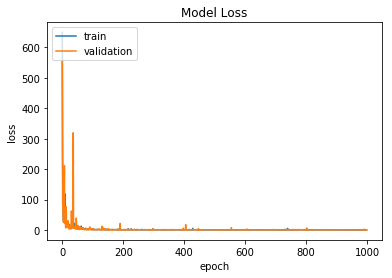

In [40]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper left')
plt.show()

### Evaluate test set

In [36]:
predicted = model.predict(X_test)

In [44]:
loss=model.evaluate(x=X_test,y=Y_test)
print(loss)

2533/2533 [==============================] - 0s 17us/step
0.44511425107470437


In [52]:
def f(x):
    return x

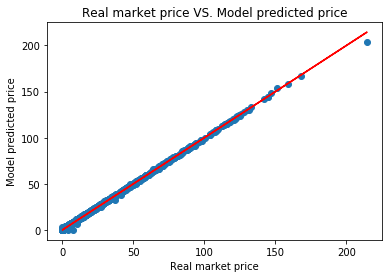

In [57]:
plt.plot(Y_test,predicted,'o')
plt.plot(Y_test,f(Y_test),'r-')
plt.title('Real market price VS. Model predicted price')
plt.xlabel('Real market price')
plt.ylabel('Model predicted price')
plt.show()

In [59]:
diff = {}
for i,pred in enumerate(predicted):
    diff[i]=abs(pred-Y_test[i])
diff = zip(diff.values(),diff.keys())
top10 = sorted(diff)[:20]
for item in top10:
    ind = item[1]
    print("Real Market Price is: {}".format(Y_test[ind]))
    print("Model Predicted Price is: {}".format(predicted[ind]))
    print("\n")

Real Market Price is: [42.59999847]
Model Predicted Price is: [42.599716]


Real Market Price is: [0.745]
Model Predicted Price is: [0.74562263]


Real Market Price is: [57.5]
Model Predicted Price is: [57.49872]


Real Market Price is: [0.375]
Model Predicted Price is: [0.3733883]


Real Market Price is: [31.32500076]
Model Predicted Price is: [31.326653]


Real Market Price is: [9.22500038]
Model Predicted Price is: [9.22331]


Real Market Price is: [23.92499924]
Model Predicted Price is: [23.926813]


Real Market Price is: [32.59999847]
Model Predicted Price is: [32.603027]


Real Market Price is: [17.375]
Model Predicted Price is: [17.371962]


Real Market Price is: [0.175]
Model Predicted Price is: [0.17891884]




In [60]:
diff = {}
for i,pred in enumerate(predicted):
    diff[i]=abs(pred-Y_test[i])
diff = zip(diff.values(),diff.keys())
worst10 = sorted(diff,reverse=True)[:10]
print("Worst 10 matches\n")
for item in worst10:
    ind = item[1]
    print("Real Market Price is: {}".format(Y_test[ind]))
    print("Model Predicted Price is: {}\n".format(predicted[ind]))

Worst 10 matches

Real Market Price is: [214.375]
Model Predicted Price is: [203.98166]

Real Market Price is: [7.5]
Model Predicted Price is: [0.]

Real Market Price is: [37.22499847]
Model Predicted Price is: [32.637817]

Real Market Price is: [4.0250001]
Model Predicted Price is: [0.]

Real Market Price is: [10.14999962]
Model Predicted Price is: [6.1971474]

Real Market Price is: [0.03]
Model Predicted Price is: [3.391079]

Real Market Price is: [41.40000153]
Model Predicted Price is: [38.212234]

Real Market Price is: [9.32499981]
Model Predicted Price is: [11.8765545]

Real Market Price is: [63.55000305]
Model Predicted Price is: [65.85187]

Real Market Price is: [29.375]
Model Predicted Price is: [31.666138]

